#### About
Predicting airbnb prices.
> Dataset link - https://www.kaggle.com/datasets/stevezhenghp/airbnb-price-prediction


In [ ]:
#importing modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from scipy import stats

# model selection
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

#model tuning
from sklearn.model_selection import GridSearchCV

# filter warnings
import warnings
from sklearn.exceptions import ConvergenceWarning
# Filter out Convergence and Future warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Calculate R-squared on the test set
from sklearn.metrics import r2_score


In [2]:
df_original = pd.read_csv('/home/suraj/ClickUp/Jan-Feb/data-science-ml-dl-projects/03-case-studies/04-predicting-airbnb-prices/train.csv')

In [3]:
df = df_original

In [4]:
df.columns

Index(['id', 'log_price', 'property_type', 'room_type', 'amenities',
       'accommodates', 'bathrooms', 'bed_type', 'cancellation_policy',
       'cleaning_fee', 'city', 'description', 'first_review',
       'host_has_profile_pic', 'host_identity_verified', 'host_response_rate',
       'host_since', 'instant_bookable', 'last_review', 'latitude',
       'longitude', 'name', 'neighbourhood', 'number_of_reviews',
       'review_scores_rating', 'thumbnail_url', 'zipcode', 'bedrooms', 'beds'],
      dtype='object')

#### 1. Data pre-processing.

In [5]:
# drop unnecessary columns
df.drop(['id', 'amenities', 'description', 'first_review', 'last_review', 'thumbnail_url'], axis=1, inplace=True)


In [6]:
# convert log_price to regular price
df['price'] = np.exp(df['log_price'])
df = df.drop(['log_price'], axis=1)


In [7]:
# handle missing values
df['cleaning_fee'].fillna(value=0, inplace=True)
df.dropna(inplace=True)

df.fillna({'review_scores_rating': df['review_scores_rating'].mean()}, inplace=True)  # fill missing review_scores_rating with mean value

In [8]:
# convert categorical variables to numerical using one-hot encoding
categorical_cols = ['property_type', 'room_type', 'bed_type', 'cancellation_policy', 'city', 'neighbourhood']
df = pd.get_dummies(df, columns=categorical_cols)

In [9]:
df

,accommodates,bathrooms,cleaning_fee,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,latitude,longitude,...,neighbourhood_Windsor Terrace,neighbourhood_Winnetka,neighbourhood_Woodhaven,neighbourhood_Woodland,neighbourhood_Woodland Hills/Warner Center,neighbourhood_Woodlawn,neighbourhood_Woodley Park,neighbourhood_Woodridge,neighbourhood_Woodside,neighbourhood_Wrigleyville
1,7,1.0,True,t,f,100%,2017-06-19,t,40.766115,-73.989040,...,0,0,0,0,0,0,0,0,0,0
2,5,1.0,True,t,t,100%,2016-10-25,t,40.808110,-73.943756,...,0,0,0,0,0,0,0,0,0,0
4,2,1.0,True,t,t,100%,2015-03-01,t,38.925627,-77.034596,...,0,0,0,0,0,0,0,0,0,0
5,2,1.0,True,t,t,100%,2017-06-07,t,37.753164,-122.429526,...,0,0,0,0,0,0,0,0,0,0
7,2,1.0,True,t,t,100%,2013-05-18,f,34.046737,-118.260439,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74102,10,3.0,False,t,f,100%,2013-07-01,f,34.199671,-118.618070,...,0,0,0,0,0,0,0,0,0,0
74103,2,1.0,True,t,f,100%,2011-09-26,f,37.789989,-122.407384,...,0,0,0,0,0,0,0,0,0,0
74107,4,2.0,True,t,f,100%,2016-05-03,f,33.871549,-118.396053,...,0,0,0,0,0,0,0,0,0,0
74108,5,1.0,True,t,t,100%,2012-01-05,t,40.706749,-73.942377,...,0,0,0,0,0,0,0,0,0,0


In [10]:
#converting string values to numeric
df['host_has_profile_pic'] = df['host_has_profile_pic'].map({'t': 1, 'f': 0})
df['host_identity_verified'] = df['host_identity_verified'].map({'t': 1, 'f': 0})
df['instant_bookable'] = df['instant_bookable'].map({'t': 1, 'f': 0})

# convert boolean variables to numerical
df['host_has_profile_pic'] = df['host_has_profile_pic'].astype(int)
df['host_identity_verified'] = df['host_identity_verified'].astype(int)
df['instant_bookable'] = df['instant_bookable'].astype(int)


In [11]:
df

,accommodates,bathrooms,cleaning_fee,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,latitude,longitude,...,neighbourhood_Windsor Terrace,neighbourhood_Winnetka,neighbourhood_Woodhaven,neighbourhood_Woodland,neighbourhood_Woodland Hills/Warner Center,neighbourhood_Woodlawn,neighbourhood_Woodley Park,neighbourhood_Woodridge,neighbourhood_Woodside,neighbourhood_Wrigleyville
1,7,1.0,True,1,0,100%,2017-06-19,1,40.766115,-73.989040,...,0,0,0,0,0,0,0,0,0,0
2,5,1.0,True,1,1,100%,2016-10-25,1,40.808110,-73.943756,...,0,0,0,0,0,0,0,0,0,0
4,2,1.0,True,1,1,100%,2015-03-01,1,38.925627,-77.034596,...,0,0,0,0,0,0,0,0,0,0
5,2,1.0,True,1,1,100%,2017-06-07,1,37.753164,-122.429526,...,0,0,0,0,0,0,0,0,0,0
7,2,1.0,True,1,1,100%,2013-05-18,0,34.046737,-118.260439,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74102,10,3.0,False,1,0,100%,2013-07-01,0,34.199671,-118.618070,...,0,0,0,0,0,0,0,0,0,0
74103,2,1.0,True,1,0,100%,2011-09-26,0,37.789989,-122.407384,...,0,0,0,0,0,0,0,0,0,0
74107,4,2.0,True,1,0,100%,2016-05-03,0,33.871549,-118.396053,...,0,0,0,0,0,0,0,0,0,0
74108,5,1.0,True,1,1,100%,2012-01-05,1,40.706749,-73.942377,...,0,0,0,0,0,0,0,0,0,0


In [12]:
df['zipcode']

1          10019
2          10027
4          20009
5          94131
7          90015
          ...   
74102      91307
74103      94108
74107      90254
74108    11206.0
74110      90802
Name: zipcode, Length: 42776, dtype: object

In [13]:
le = LabelEncoder()
df['zipcode'] = le.fit_transform(df['zipcode'])  # encode zipcode numerically
df['cleaning_fee'] = le.fit_transform(df['cleaning_fee'])


In [14]:
#feature scaling
scaler = StandardScaler()
df[['accommodates', 'bathrooms', 'latitude', 'longitude', 'bedrooms', 'beds']] = scaler.fit_transform(df[['accommodates', 'bathrooms', 'latitude', 'longitude', 'bedrooms', 'beds']])


In [15]:
non_numeric_cols = df.select_dtypes(exclude='number').columns.tolist()
print(non_numeric_cols)

['host_response_rate', 'host_since', 'name']


#### 2. Feature Engineering

In [16]:
# Feature engineering
df['host_response_rate'] = df['host_response_rate'].str.rstrip('%').astype('float') / 100.0  # convert host_response_rate to a float between 0 and 1
df['host_since'] = pd.to_datetime(df['host_since'])  # convert host_since to datetime
df['days_since_host'] = (pd.to_datetime('2023-04-07') - df['host_since']).dt.days  # create a new feature representing the number of days since the host joined AirBNB

In [17]:
df

,accommodates,bathrooms,cleaning_fee,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,latitude,longitude,...,neighbourhood_Winnetka,neighbourhood_Woodhaven,neighbourhood_Woodland,neighbourhood_Woodland Hills/Warner Center,neighbourhood_Woodlawn,neighbourhood_Woodley Park,neighbourhood_Woodridge,neighbourhood_Woodside,neighbourhood_Wrigleyville,days_since_host
1,1.673844,-0.406068,1,1,0,1.0,2017-06-19,1,0.692160,0.810617,...,0,0,0,0,0,0,0,0,0,2118
2,0.767321,-0.406068,1,1,1,1.0,2016-10-25,1,0.706003,0.812723,...,0,0,0,0,0,0,0,0,0,2355
4,-0.592463,-0.406068,1,1,1,1.0,2015-03-01,1,0.085463,0.669026,...,0,0,0,0,0,0,0,0,0,2959
5,-0.592463,-0.406068,1,1,1,1.0,2017-06-07,1,-0.301026,-1.441436,...,0,0,0,0,0,0,0,0,0,2130
7,-0.592463,-0.406068,1,1,1,1.0,2013-05-18,0,-1.522809,-1.247611,...,0,0,0,0,0,0,0,0,0,3611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74102,3.033628,3.060988,0,1,0,1.0,2013-07-01,0,-1.472396,-1.264237,...,0,0,0,0,0,0,0,0,0,3567
74103,-0.592463,-0.406068,1,1,0,1.0,2011-09-26,0,-0.288887,-1.440407,...,0,0,0,0,0,0,0,0,0,4211
74107,0.314060,1.327460,1,1,0,1.0,2016-05-03,0,-1.580558,-1.253916,...,0,0,0,0,0,0,0,0,0,2530
74108,0.767321,-0.406068,1,1,1,1.0,2012-01-05,1,0.672590,0.812787,...,0,0,0,0,0,0,0,0,0,4110


In [18]:
# Create an interaction term between accommodates and bedrooms
df['acc_bed'] = df['accommodates'] * df['bedrooms']

In [19]:
df

,accommodates,bathrooms,cleaning_fee,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,latitude,longitude,...,neighbourhood_Woodhaven,neighbourhood_Woodland,neighbourhood_Woodland Hills/Warner Center,neighbourhood_Woodlawn,neighbourhood_Woodley Park,neighbourhood_Woodridge,neighbourhood_Woodside,neighbourhood_Wrigleyville,days_since_host,acc_bed
1,1.673844,-0.406068,1,1,0,1.0,2017-06-19,1,0.692160,0.810617,...,0,0,0,0,0,0,0,0,2118,3.335722
2,0.767321,-0.406068,1,1,1,1.0,2016-10-25,1,0.706003,0.812723,...,0,0,0,0,0,0,0,0,2355,-0.247767
4,-0.592463,-0.406068,1,1,1,1.0,2015-03-01,1,0.085463,0.669026,...,0,0,0,0,0,0,0,0,2959,0.877303
5,-0.592463,-0.406068,1,1,1,1.0,2017-06-07,1,-0.301026,-1.441436,...,0,0,0,0,0,0,0,0,2130,0.191305
7,-0.592463,-0.406068,1,1,1,1.0,2013-05-18,0,-1.522809,-1.247611,...,0,0,0,0,0,0,0,0,3611,0.191305
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74102,3.033628,3.060988,0,1,0,1.0,2013-07-01,0,-1.472396,-1.264237,...,0,0,0,0,0,0,0,0,3567,-0.979553
74103,-0.592463,-0.406068,1,1,0,1.0,2011-09-26,0,-0.288887,-1.440407,...,0,0,0,0,0,0,0,0,4211,0.191305
74107,0.314060,1.327460,1,1,0,1.0,2016-05-03,0,-1.580558,-1.253916,...,0,0,0,0,0,0,0,0,2530,0.262232
74108,0.767321,-0.406068,1,1,1,1.0,2012-01-05,1,0.672590,0.812787,...,0,0,0,0,0,0,0,0,4110,0.640695


In [20]:
# Convert host_since to datetime
df['host_since'] = pd.to_datetime(df['host_since'])

# Create a feature for the year the host joined
df['host_year'] = df['host_since'].dt.year

# Create a feature for the month the host joined
df['host_month'] = df['host_since'].dt.month

In [21]:
df= df.drop(['host_since','name'],axis=1)

In [22]:
df

,accommodates,bathrooms,cleaning_fee,host_has_profile_pic,host_identity_verified,host_response_rate,instant_bookable,latitude,longitude,number_of_reviews,...,neighbourhood_Woodland Hills/Warner Center,neighbourhood_Woodlawn,neighbourhood_Woodley Park,neighbourhood_Woodridge,neighbourhood_Woodside,neighbourhood_Wrigleyville,days_since_host,acc_bed,host_year,host_month
1,1.673844,-0.406068,1,1,0,1.0,1,0.692160,0.810617,6,...,0,0,0,0,0,0,2118,3.335722,2017,6
2,0.767321,-0.406068,1,1,1,1.0,1,0.706003,0.812723,10,...,0,0,0,0,0,0,2355,-0.247767,2016,10
4,-0.592463,-0.406068,1,1,1,1.0,1,0.085463,0.669026,4,...,0,0,0,0,0,0,2959,0.877303,2015,3
5,-0.592463,-0.406068,1,1,1,1.0,1,-0.301026,-1.441436,3,...,0,0,0,0,0,0,2130,0.191305,2017,6
7,-0.592463,-0.406068,1,1,1,1.0,0,-1.522809,-1.247611,9,...,0,0,0,0,0,0,3611,0.191305,2013,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74102,3.033628,3.060988,0,1,0,1.0,0,-1.472396,-1.264237,1,...,0,0,0,0,0,0,3567,-0.979553,2013,7
74103,-0.592463,-0.406068,1,1,0,1.0,0,-0.288887,-1.440407,24,...,0,0,0,0,0,0,4211,0.191305,2011,9
74107,0.314060,1.327460,1,1,0,1.0,0,-1.580558,-1.253916,16,...,0,0,0,0,0,0,2530,0.262232,2016,5
74108,0.767321,-0.406068,1,1,1,1.0,1,0.672590,0.812787,43,...,0,0,0,0,0,0,4110,0.640695,2012,1


#### 3. Exploratory Data Analysis

In [23]:
# Check the data types of each column
print(df_original.dtypes)


log_price                 float64
property_type              object
room_type                  object
accommodates                int64
bathrooms                 float64
bed_type                   object
cancellation_policy        object
cleaning_fee                 bool
city                       object
host_has_profile_pic       object
host_identity_verified     object
host_response_rate         object
host_since                 object
instant_bookable           object
latitude                  float64
longitude                 float64
name                       object
neighbourhood              object
number_of_reviews           int64
review_scores_rating      float64
zipcode                    object
bedrooms                  float64
beds                      float64
price                     float64
dtype: object


In [24]:
# Summary statistics for numeric columns
print(df_original.describe())

          log_price  accommodates     bathrooms      latitude     longitude  \
count  74111.000000  74111.000000  73911.000000  74111.000000  74111.000000   
mean       4.782069      3.155146      1.235263     38.445958    -92.397525   
std        0.717394      2.153589      0.582044      3.080167     21.705322   
min        0.000000      1.000000      0.000000     33.338905   -122.511500   
25%        4.317488      2.000000      1.000000     34.127908   -118.342374   
50%        4.709530      2.000000      1.000000     40.662138    -76.996965   
75%        5.220356      4.000000      1.000000     40.746096    -73.954660   
max        7.600402     16.000000      8.000000     42.390437    -70.985047   

       number_of_reviews  review_scores_rating      bedrooms          beds  \
count       74111.000000          57389.000000  74020.000000  73980.000000   
mean           20.900568             94.067365      1.265793      1.710868   
std            37.828641              7.836556      0.

/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


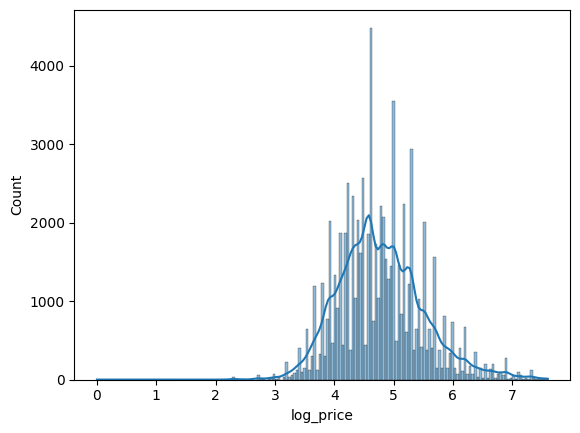

In [25]:
# Histogram of log price
sns.histplot(df_original['log_price'], kde=True)
plt.show()


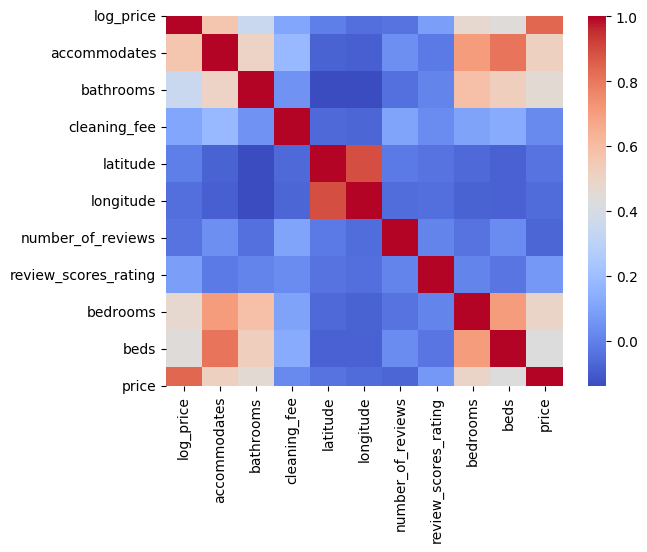

In [26]:
# Correlation heatmap
corr_matrix = df_original.corr()
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.show()

- The scatter plot shows that there is a positive relationship between accommodates and log price. In other words, as the number of people a property can accommodate increases, the price tends to increase as well. However, this relationship is not perfectly linear, as there are some properties with high accommodates values and relatively low prices, and vice versa.

- The scatter plot also allows us to identify potential outliers, which are points that are far away from the rest of the data. These outliers may represent properties with unusual characteristics or errors in the data. It is important to investigate outliers further to determine whether they should be removed from the dataset or kept as important data points.

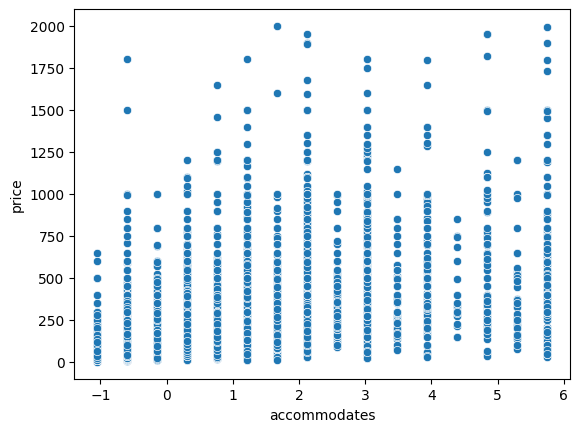

In [32]:
# Scatter plot of accommodates vs log price
sns.scatterplot(data=df, x='accommodates', y='price')
plt.show()

> Removing outliers using Tukey's method

- Tukey's method, also known as the Tukey box plot, is a statistical method used to identify outliers in a dataset based on the interquartile range (IQR). The IQR is the difference between the first quartile (Q1) and the third quartile (Q3) of a distribution. According to Tukey's method, any data point that falls below Q1 - 1.5IQR or above Q3 + 1.5IQR is considered an outlier.

- The method is often used to identify outliers in box plots, which visualize the distribution of a dataset using a box that extends from the first to the third quartile, with a line inside the box indicating the median value. Tukey's method can also be used to identify outliers in scatter plots or other visualizations of a dataset.

In [33]:
# Calculate Tukey's method thresholds for 'accommodates'
Q1 = df['accommodates'].quantile(0.25)
Q3 = df['accommodates'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

# Identify outliers based on 'accommodates'
outliers = df[(df['accommodates'] < lower_bound) | (df['accommodates'] > upper_bound)]

# Print number of outliers and their indices
print(f"Number of outliers: {len(outliers)}")
print(f"Indices of outliers: {outliers.index}")

# Remove outliers from the DataFrame
df = df.drop(outliers.index)

Number of outliers: 2368
Indices of outliers: Int64Index([   19,    42,   104,   109,   120,   124,   237,   254,   306,
              347,
            ...
            73939, 73953, 73957, 73980, 73997, 74026, 74031, 74032, 74042,
            74102],
           dtype='int64', length=2368)


In [34]:
df

,accommodates,bathrooms,cleaning_fee,host_has_profile_pic,host_identity_verified,host_response_rate,instant_bookable,latitude,longitude,number_of_reviews,...,neighbourhood_Woodland Hills/Warner Center,neighbourhood_Woodlawn,neighbourhood_Woodley Park,neighbourhood_Woodridge,neighbourhood_Woodside,neighbourhood_Wrigleyville,days_since_host,acc_bed,host_year,host_month
1,1.673844,-0.406068,1,1,0,1.0,1,0.692160,0.810617,6,...,0,0,0,0,0,0,2118,3.335722,2017,6
2,0.767321,-0.406068,1,1,1,1.0,1,0.706003,0.812723,10,...,0,0,0,0,0,0,2355,-0.247767,2016,10
4,-0.592463,-0.406068,1,1,1,1.0,1,0.085463,0.669026,4,...,0,0,0,0,0,0,2959,0.877303,2015,3
5,-0.592463,-0.406068,1,1,1,1.0,1,-0.301026,-1.441436,3,...,0,0,0,0,0,0,2130,0.191305,2017,6
7,-0.592463,-0.406068,1,1,1,1.0,0,-1.522809,-1.247611,9,...,0,0,0,0,0,0,3611,0.191305,2013,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74100,-0.592463,-0.406068,1,1,1,1.0,0,0.675337,0.812625,32,...,0,0,0,0,0,0,4068,0.191305,2012,2
74103,-0.592463,-0.406068,1,1,0,1.0,0,-0.288887,-1.440407,24,...,0,0,0,0,0,0,4211,0.191305,2011,9
74107,0.314060,1.327460,1,1,0,1.0,0,-1.580558,-1.253916,16,...,0,0,0,0,0,0,2530,0.262232,2016,5
74108,0.767321,-0.406068,1,1,1,1.0,1,0.672590,0.812787,43,...,0,0,0,0,0,0,4110,0.640695,2012,1


> To identify outliers using the Z-score method, we calculate the Z-score for each data point, which represents the number of standard deviations the point is away from the mean of the distribution. Data points with a Z-score above a certain threshold are considered outliers.

In [36]:
# Calculate Z-score for log_price column
z_scores = stats.zscore(df['price'])

# Identify data points with Z-score above 3 or below -3
outliers = (z_scores > 3) | (z_scores < -3)

# Print number of outliers
print("Number of outliers:", outliers.sum())

# Remove outliers from dataframe
df = df[~outliers]

Number of outliers: 771


In [37]:
df

,accommodates,bathrooms,cleaning_fee,host_has_profile_pic,host_identity_verified,host_response_rate,instant_bookable,latitude,longitude,number_of_reviews,...,neighbourhood_Woodland Hills/Warner Center,neighbourhood_Woodlawn,neighbourhood_Woodley Park,neighbourhood_Woodridge,neighbourhood_Woodside,neighbourhood_Wrigleyville,days_since_host,acc_bed,host_year,host_month
1,1.673844,-0.406068,1,1,0,1.0,1,0.692160,0.810617,6,...,0,0,0,0,0,0,2118,3.335722,2017,6
2,0.767321,-0.406068,1,1,1,1.0,1,0.706003,0.812723,10,...,0,0,0,0,0,0,2355,-0.247767,2016,10
4,-0.592463,-0.406068,1,1,1,1.0,1,0.085463,0.669026,4,...,0,0,0,0,0,0,2959,0.877303,2015,3
5,-0.592463,-0.406068,1,1,1,1.0,1,-0.301026,-1.441436,3,...,0,0,0,0,0,0,2130,0.191305,2017,6
7,-0.592463,-0.406068,1,1,1,1.0,0,-1.522809,-1.247611,9,...,0,0,0,0,0,0,3611,0.191305,2013,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74100,-0.592463,-0.406068,1,1,1,1.0,0,0.675337,0.812625,32,...,0,0,0,0,0,0,4068,0.191305,2012,2
74103,-0.592463,-0.406068,1,1,0,1.0,0,-0.288887,-1.440407,24,...,0,0,0,0,0,0,4211,0.191305,2011,9
74107,0.314060,1.327460,1,1,0,1.0,0,-1.580558,-1.253916,16,...,0,0,0,0,0,0,2530,0.262232,2016,5
74108,0.767321,-0.406068,1,1,1,1.0,1,0.672590,0.812787,43,...,0,0,0,0,0,0,4110,0.640695,2012,1


> Box Plot

The box represents the middle 50% of the data, with the bottom and top of the box representing the 25th and 75th percentiles respectively. The line inside the box represents the median.

The whiskers extending from the box show the range of the data, with any points beyond the whiskers considered outliers. In this case, there are some outliers for the Entire home/apt and Shared room categories.



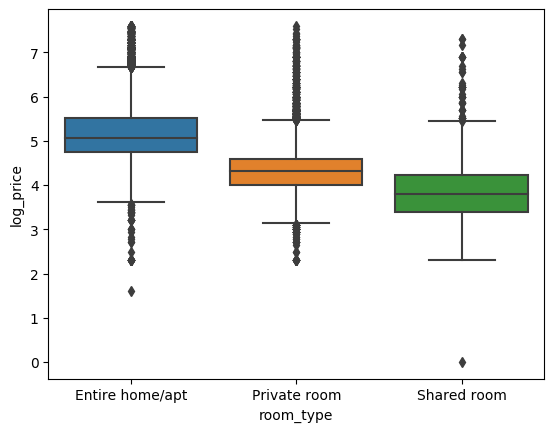

In [39]:
# Boxplot of log price by room type
sns.boxplot(data=df_original, x='room_type', y='log_price')
plt.show()

From this plot, we can see that the Entire home/apt category generally has higher log_price values compared to the other categories. The Private room and Shared room categories have a smaller range of log_price values, with the Shared room category having the lowest median value.

> Violin Plot

This violin plot shows the distribution of log prices for each level of cancellation policy. The width of each violin represents the density of data points at each price level, with wider sections indicating more data points. The white dot inside each violin represents the median price for that level of cancellation policy, while the thin black lines extending from the violins (known as whiskers) indicate the range of data points

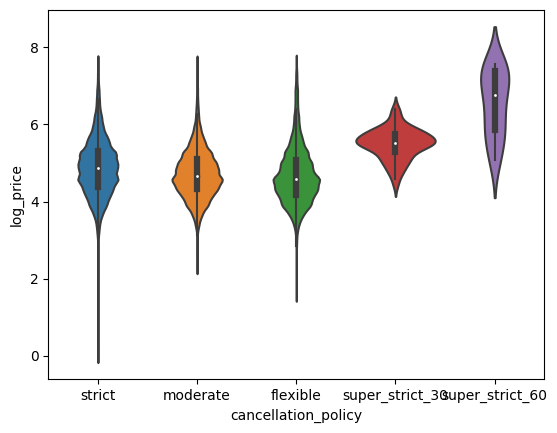

In [41]:
# Violin plot of log price by cancellation policy
sns.violinplot(data=df_original, x='cancellation_policy', y='log_price')
plt.show()

We can observe that the median log price is higher for the super strict cancellation policy, followed by moderate and flexible, with the least median price for the strict policy. Additionally, the distribution of log prices for the super strict cancellation policy is very narrow compared to the other policies, indicating that there are fewer data points in this group, but they are more consistently priced. In contrast, the distribution of log prices for the flexible and moderate cancellation policies is wider, indicating more variability in prices within those groups.

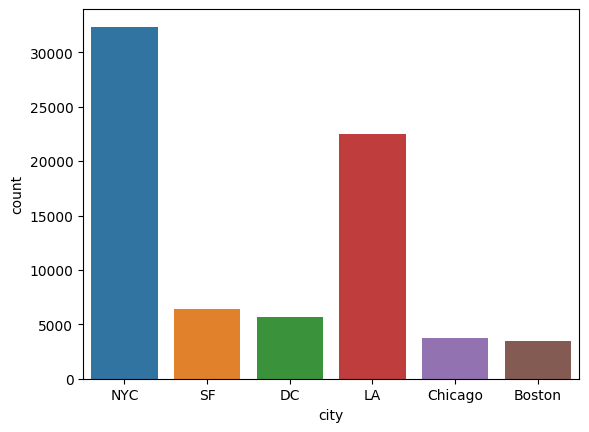

In [43]:
# Bar plot of number of listings by city
sns.countplot(data=df_original, x='city')
plt.show()

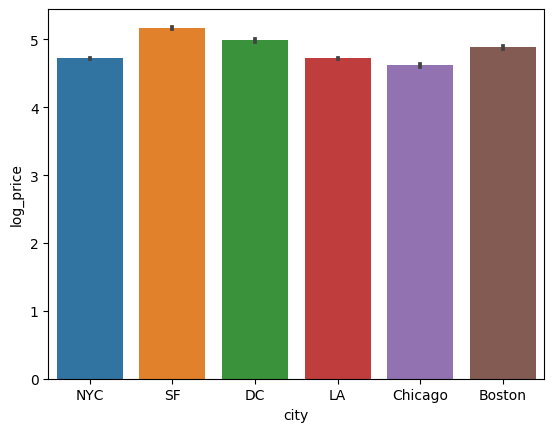

In [44]:
# Bar plot of mean log price by city
sns.barplot(data=df_original, x='city', y='log_price')
plt.show()

#### 4. Model Selection


In [48]:
y = df['price']
X = df.drop(['price'],axis=1)

In [49]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [50]:

# Define the models to train
models = [('Linear Regression', LinearRegression()),
          ('Decision Tree', DecisionTreeRegressor()),
          ('Random Forest', RandomForestRegressor()),
          ('Neural Network', MLPRegressor(max_iter=1000, random_state=42))]


In [52]:
# Train and evaluate each model
for name, model in models:
    pipeline = Pipeline(steps=[('model', model)])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    print(f'{name}: MSE = {mse:.2f}, MAE = {mae:.2f}')

Linear Regression: MSE = 164138459570074.47, MAE = 209920.82
Decision Tree: MSE = 3573.02, MAE = 40.38
Random Forest: MSE = 1920.79, MAE = 29.77
Neural Network: MSE = 2149.33, MAE = 33.94


#### 5. Model tuning

In [64]:
lr = LinearRegression()
dt = DecisionTreeRegressor()
rf = RandomForestRegressor()
nn = MLPRegressor(max_iter=1000, random_state=42)

lr_params = {'normalize': [True, False]}

dt_params = {'max_depth': [5, 10, 15],
             'min_samples_split': [2, 5, 10]}

rf_params = {'n_estimators': [50,  200],
             'max_depth': [5, 15],
             'min_samples_split': [2, 10]}

nn_params = {'hidden_layer_sizes': [(10,), (20,), (30,)],
             'activation': ['relu', 'logistic'],
             'alpha': [0.0001, 0.001, 0.01]}


In [65]:
# Create a list of tuples containing each model and its respective hyperparameters
models = [(lr, lr_params), (dt, dt_params), (rf, rf_params), (nn, nn_params)]


In [66]:
# Train and evaluate each model with cross-validation
for model, params in models:
    grid = GridSearchCV(model, params, cv=5)
    grid.fit(X_train, y_train)
    y_pred = grid.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    print(f"Model: {type(model).__name__}")
    print(f"Best parameters: {grid.best_params_}")
    print(f"MSE: {mse:.4f}")
    print(f"MAE: {mae:.4f}")
    print('-' * 30)

Model: LinearRegression
Best parameters: {'normalize': False}
MSE: 164138459570074.4688
MAE: 209920.8230
------------------------------
Model: DecisionTreeRegressor
Best parameters: {'max_depth': 10, 'min_samples_split': 10}
MSE: 2428.1230
MAE: 33.8697
------------------------------


KeyboardInterrupt: 

#### 6. Model Interpretation.

- In a linear regression model, the coefficients can be used to determine the direction and magnitude of the effect of each feature on the target variable. Positive coefficients indicate that as the feature value increases, the target variable also increases, while negative coefficients indicate that as the feature value increases, the target variable decreases.

- In a decision tree or random forest model, feature importance can be used to understand the relative importance of each feature in determining the target variable. Features with higher importance are more influential in predicting the target variable.

- In a neural network model, it can be more difficult to interpret the individual effects of each feature due to the complexity of the model. However, techniques such as sensitivity analysis can be used to understand how changes in the input features affect the output.

> We'll evaluate feature importance using Random forest to check how each variable affects the price.

In [ ]:
# Training the model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)

# Getting feature importances
importances = rf.feature_importances_

# Creating a dataframe of feature importances
feature_importances = pd.DataFrame({'feature': X_train.columns, 'importance': importances})

# Sorting the features by importance
feature_importances = feature_importances.sort_values('importance', ascending=False)



In [84]:
# Printing the feature importances
feature_importances

,feature,importance
45,room_type_Entire home/apt,0.331921
8,longitude,0.104477
12,bedrooms,0.090691
11,zipcode,0.085010
7,latitude,0.069193
...,...,...
401,neighbourhood_Mill Basin,0.000000
454,neighbourhood_Observatory Circle,0.000000
162,"neighbourhood_Chevy Chase, MD",0.000000
152,neighbourhood_Castleton Corners,0.000000
